<a href="https://colab.research.google.com/github/samidha1610/Mini-Project/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MINI PROJECT : IMAGE CLASSIFICATION USING MACHINE LEARNING

In this project we have to predict the the given image is of cat or dog.

In [ ]:
# preprocessing: there are two steps of preprocessing
# 1.resize
# 2.flatten

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []  # output data
images = []  #data
flat_data = []   #flatten data

In [ ]:
DATADIR = '/content/images'            #path from where images have to consider
CATEGORIES = ['cat image','dog image']

for category in CATEGORIES:
    class_num = CATEGORIES.index(category) # label encoding  the values
    path =os.path.join(DATADIR,category)     #create path to use all the images
    
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        
        img_resized = resize(img_array,(150,150,3))   # resize the data and normalizes the value from 0 to 1
        flat_data.append(img_resized.flatten())      # flatten the data
        images.append(img_resized)
        target.append(class_num)
        
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [ ]:
flat_data[0]

array([0.87152941, 0.92894118, 0.97254902, ..., 0.86666667, 0.89019608,
       0.9372549 ])

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [ ]:
# spliting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.3, random_state = 0)

In [ ]:
param = {'kernel':('linear','poly','rbf','sigmoid'),
         'C':[1,52,10],
         'degree':[3,8],
         'coef0':[0.001,10,0.5],
         'gamma':('auto', 'scale')
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc = SVC()
clf = GridSearchCV(svc, param)
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 52, 10], 'coef0': [0.001, 10, 0.5],
                         'degree': [3, 8], 'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [23]:
y_test

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1])

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [25]:
print(accuracy_score(y_pred, y_test)*100)

63.934426229508205


In [26]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.52      0.65      0.58        23
           1       0.75      0.63      0.69        38

    accuracy                           0.64        61
   macro avg       0.63      0.64      0.63        61
weighted avg       0.66      0.64      0.64        61



In [27]:
confusion_matrix(y_pred, y_test)

array([[15,  8],
       [14, 24]])

In [28]:
# save the model using pickle library 
import pickle
pickle.dump(clf, open('img_model.p','wb'))

In [29]:
model = pickle.load(open('img_model.p','rb'))

Enter your url:https://upload.wikimedia.org/wikipedia/commons/c/c2/Golden-retriever-dog.jpg
(1440, 1920, 3)
PREDICTED OUTPUT: dog image


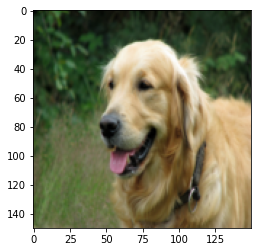

In [31]:
# testing a new image
flat_data = []
url = input('Enter your url:')
img = imread(url)

img_resized = resize(img,(150,150,3)) 
flat_data.append(img_resized.flatten()) 
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')